#Conversões
* Gênero = masculio (0), feminino (1), não binário (2)
* Idade = entre 18 e 80
* Tipo de cozinha = japonesa (0), italiana (1), árabe (2), mexicana (3), fast food (4), francesa (6)
* Bebida = não (0), não alcoólica (1), alcoólica (2)
* Sobremesa = não (0), sim (1)

In [1]:

#importando bibliotecas
import pandas as pd

#importando o arquivo
df = pd.read_csv('/home/viniciuspolo/developer/dsm/6_semestre/pi6/base400.csv', sep=';')
df.head()

,id_pedido,day_of_week,id_cliente,gender,age,id_restaurante,cousine_type,id_item,type_of_product,quantity,price,total_value
0,1,weekday,1,M,30 e 40,1,JAPONESA,1,food,1,69.9,69.9
1,2,weekend,2,F,25 e 30,1,JAPONESA,1,food,2,69.9,139.8
2,3,weekend,2,F,25 e 30,1,JAPONESA,5,alcoholicDrink,2,11.9,23.8
3,4,weekday,3,M,18 e 25,1,JAPONESA,3,food,1,49.9,49.9
4,5,weekend,1,M,30 e 40,2,ITALIANA,7,food,1,44.9,44.9


#Elimina dados duplicados


In [3]:
df_duplicates = df [ df.duplicated(subset=['day_of_week','gender','age','type_of_product','cousine_type'], keep=False)]

#se houver valores redundantes ou inconsistentes, imprima
if len(df_duplicates) > 0:
  print('\nAmostras redundantes ou inconsistentes:')
  display(df_duplicates)
else:
  print('Não existem valores duplicados')


Amostras redundantes ou inconsistentes:


,id_pedido,day_of_week,id_cliente,gender,age,id_restaurante,cousine_type,id_item,type_of_product,quantity,price,total_value
0,1,weekday,1,M,30 e 40,1,JAPONESA,1,food,1,69.9,69.9
1,2,weekend,2,F,25 e 30,1,JAPONESA,1,food,2,69.9,139.8
2,3,weekend,2,F,25 e 30,1,JAPONESA,5,alcoholicDrink,2,11.9,23.8
5,6,weekend,4,M,60+,2,ITALIANA,6,food,3,24.9,74.7
6,7,weekday,1,M,30 e 40,2,ITALIANA,4,food,4,19.9,79.6
...,...,...,...,...,...,...,...,...,...,...,...,...
396,399,weekday,41,M,40 e 60,4,CHURRASCO,19,food,1,29.5,29.5
397,400,weekday,41,M,40 e 60,4,CHURRASCO,21,drink,1,6.0,6.0
398,401,weekday,41,M,40 e 60,4,CHURRASCO,21,drink,1,6.0,6.0
399,402,weekday,41,M,40 e 60,4,CHURRASCO,21,drink,1,6.0,6.0


#Principais estatísticas


In [6]:
#apresenta as principais estatísticas da base de dados
df_detalhes = df.describe()

display(df_detalhes)

,id_pedido,id_cliente,id_restaurante,id_item,quantity,price,total_value
count,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000
mean,202.117207,12.625935,5.428928,31.546135,2.159601,23.883042,37.990773
std,116.759234,11.684166,2.774087,20.200210,2.586400,26.154149,44.051880
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.900000,0.900000
25%,101.000000,5.000000,3.000000,12.000000,1.000000,8.900000,9.900000
50%,203.000000,8.000000,6.000000,33.000000,1.000000,9.900000,19.900000
75%,303.000000,18.000000,8.000000,49.000000,2.000000,29.500000,49.900000
max,403.000000,41.000000,9.000000,65.000000,20.000000,119.900000,479.400000


In [17]:
#Substituir valores String por Inteiros [Weekday: 1, Weekend: 0] 
df.loc[df['day_of_week'] == 'weekend', 'day_of_week'] = 0
df.loc[df['day_of_week'] == 'weekday', 'day_of_week'] = 1
df.loc[df['gender'] == 'F', 'gender'] = 0
df.loc[df['gender'] == 'M', 'gender'] = 1
df.loc[df['cousine_type'] == 'JAPONESA', 'cousine_type'] = 0
df.loc[df['cousine_type'] == 'FASTFOOD', 'cousine_type'] = 1
df.loc[df['cousine_type'] == 'ARABE', 'cousine_type'] = 2
df.loc[df['cousine_type'] == 'ITALIANA', 'cousine_type'] = 3
df.loc[df['cousine_type'] == 'NORDESTINA', 'cousine_type'] = 4
df.loc[df['cousine_type'] == 'MINEIRA', 'cousine_type'] = 5
df.loc[df['cousine_type'] == 'FRANCESA', 'cousine_type'] = 6
df.loc[df['cousine_type'] == 'CHURRASCO', 'cousine_type'] = 7
df.loc[df['cousine_type'] == 'SOBREMESA', 'cousine_type'] = 8
#"JAPONESA", "FASTFOOD", "ARABE", "ITALIANA", "NORDESTINA", "MINEIRA", "CHINESA", "FRANCESA", "CHURRASCO", "SOBREMESA"
df.loc[df['age'] == '18-', 'age'] = 18
df.loc[df['age'] == '18 e 25', 'age'] = 25
df.loc[df['age'] == '25 e 30', 'age'] = 30
df.loc[df['age'] == '30 e 40', 'age'] = 40
df.loc[df['age'] == '40 e 60', 'age'] = 60
df.loc[df['age'] == '60+', 'age'] = 120
df.loc[df['type_of_product'] == 'food', 'type_of_product'] = 0
df.loc[df['type_of_product'] == 'drink', 'type_of_product'] = 1
df.loc[df['type_of_product'] == 'alcoholicDrink', 'type_of_product'] = 2
df.loc[df['type_of_product'] == 'desert', 'type_of_product'] = 3
df.head()

,id_pedido,day_of_week,id_cliente,gender,age,id_restaurante,cousine_type,id_item,type_of_product,quantity,price,total_value
0,1,1,1,1,40,1,0,1,0,1,69.9,69.9
1,2,0,2,0,30,1,0,1,0,2,69.9,139.8
2,3,0,2,0,30,1,0,5,2,2,11.9,23.8
3,4,1,3,1,25,1,0,3,0,1,49.9,49.9
4,5,0,1,1,40,2,3,7,0,1,44.9,44.9


In [20]:
df = df.drop(columns=['id_pedido','id_cliente', 'id_restaurante','id_item', 'quantity', 'price', 'total_value'])

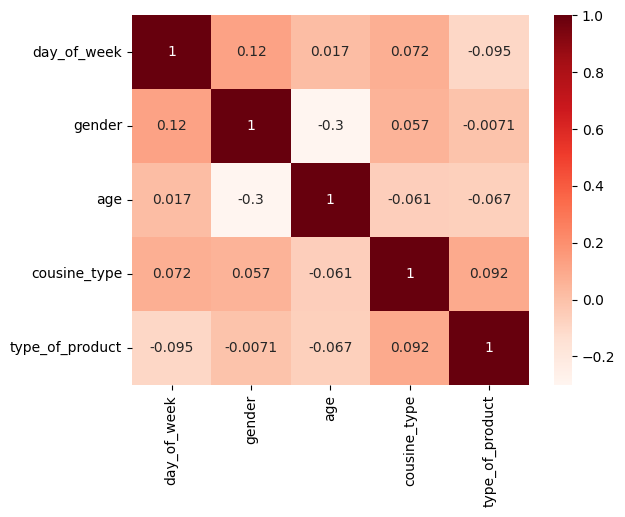

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix

sns.heatmap(df.corr(), annot=True, cmap="Reds") 
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

y = df["sobremesa"]
x = df.drop("sobremesa", axis=1)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#cria os modelos
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

#treinar
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

In [9]:
from sklearn import metrics

#cria as previsoes
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

#comparar os modelos
print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_arvoredecisao))

5.860884413355638e-05
-0.28875159778142323


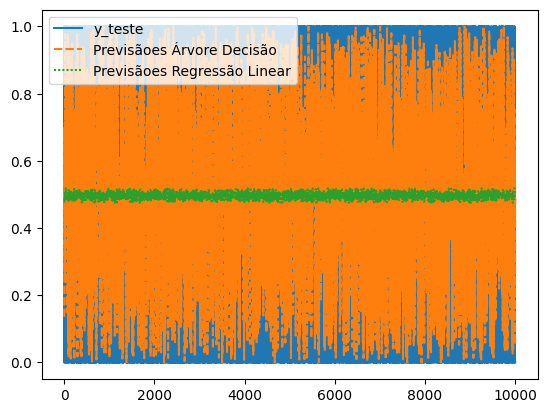

In [10]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsãoes Árvore Decisão"] = previsao_arvoredecisao
tabela_auxiliar["Previsãoes Regressão Linear"] = previsao_regressaolinear

sns.lineplot(data=tabela_auxiliar)
plt.show()